In [2]:
from Run import Run
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [65]:
# look to find timing parameters to allow t0 to be referenced to rf
# first consider only one spill

folder = "C:/Users/Karlen/Documents/temp/wtime/"

run_number = 502
run = Run.open_file(folder+"run_000"+str(run_number)+".dk")
config = run.config

if 'signal_times' in run.user:
    signal_times = run.user['signal_times']
else:
    signal_times = None

In [3]:
# Use ch8 to find timing parameters, insist that both 8 and 9 have 1 peak
channels = [8,9]
digi = int(channels[0]/8)
spill = 0

spill_events = np.where(run.times[digi]['spillNumber']==spill)
ch_times = []
triggerTimes = []
triggerTime0 = None
for ie in spill_events[0]:
    if len(signal_times[channels[0]][ie]) == 1 and len(signal_times[channels[1]][ie]) == 1:
        if triggerTime0 is None:
            triggerTime0 = run.times[digi]['triggerTime'][ie]
        ch_times.append(signal_times[channels[0]][ie][0])
        triggerTimes.append(run.times[digi]['triggerTime'][ie]- triggerTime0)


In [18]:
# calculate the rms of the tch8rf dist
td = 8

trf = 305.1
ttt0 = 1.3

tdiff = []

#def rms(trf,ttt0):
m = int(trf/td)
delta = trf - m*td

t_offsets = [ttt0]
t_offset = ttt0
tx = 0
for ch_time, triggerTime in zip(ch_times[1:], triggerTimes[1:]):
    while tx < triggerTime - m:
        t_offset += delta
        if t_offset > td:
            t_offset -= td
            tx -= 1
        tx += m
    tdiff.append(triggerTime-tx)
    t_off_approx = t_offset + delta*(triggerTime-tx)/m
    if t_off_approx > td:
        t_off_approx -= td
    t_offsets.append(t_off_approx)





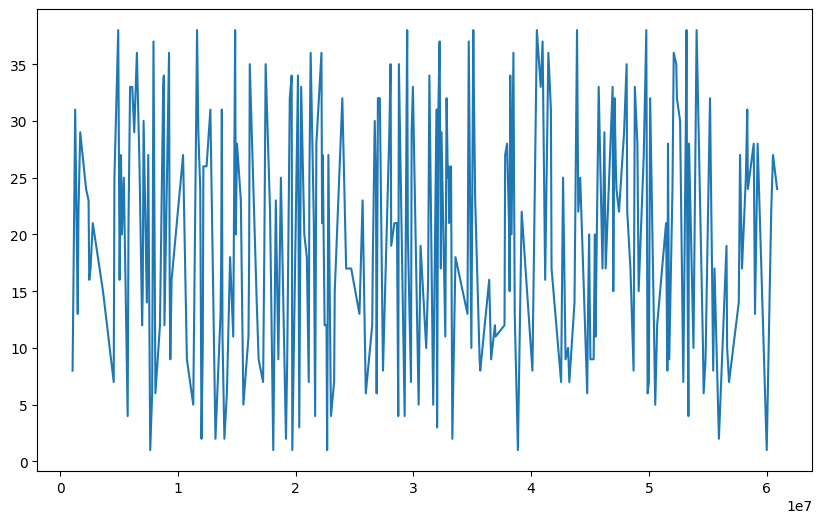

In [19]:
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
plt.plot(triggerTimes[1:],tdiff)

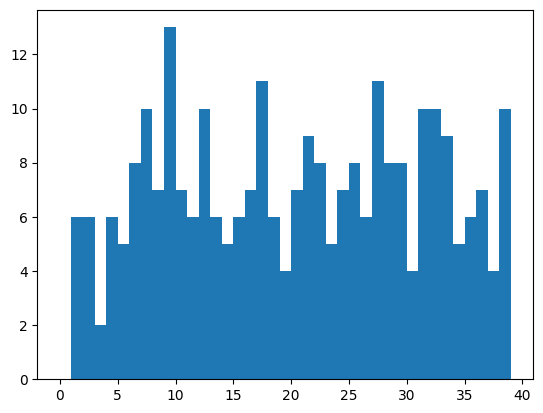

In [20]:
plt.hist(tdiff,bins=range(40))
plt.show()

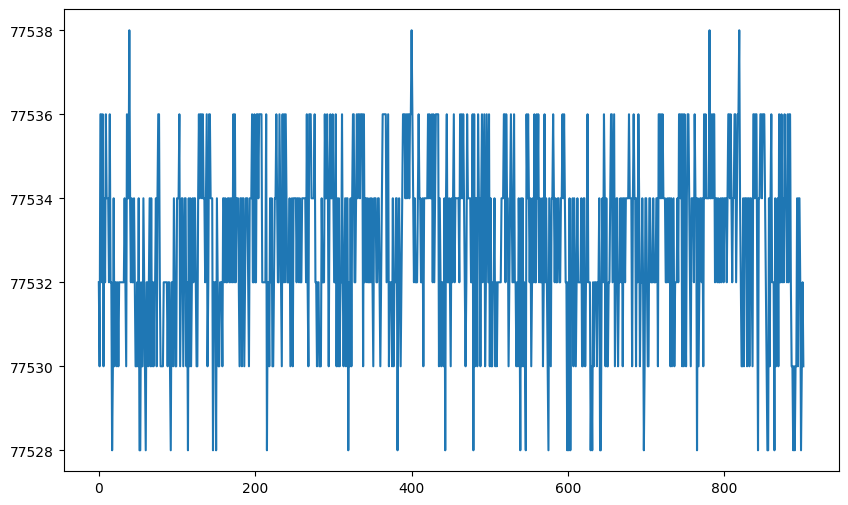

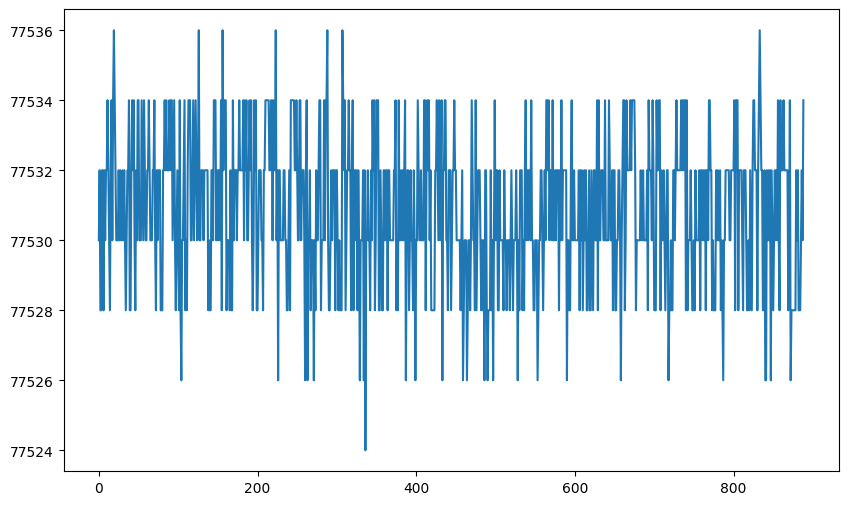

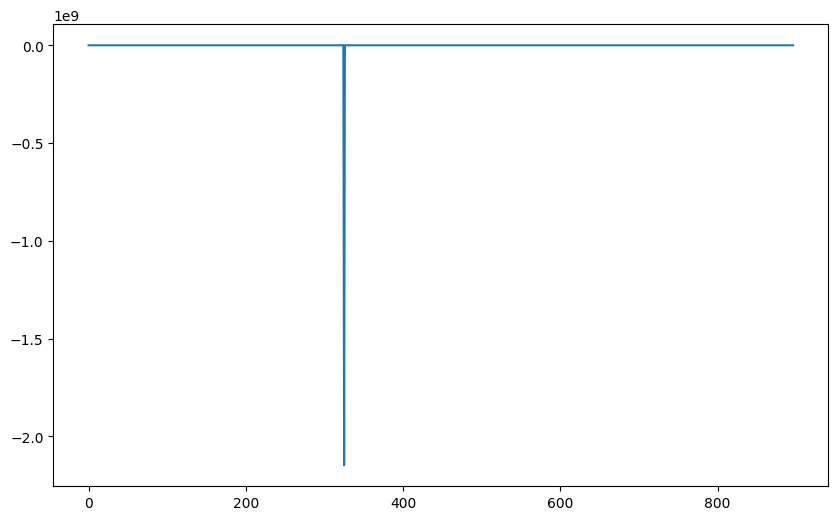

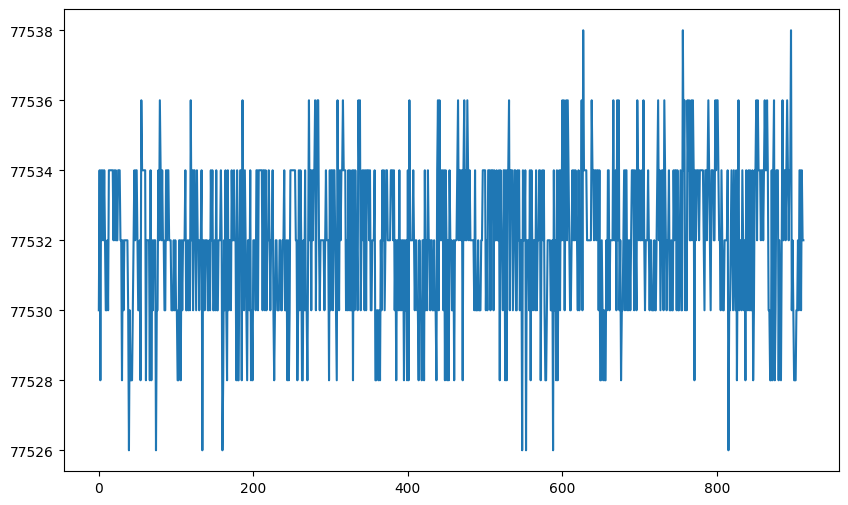

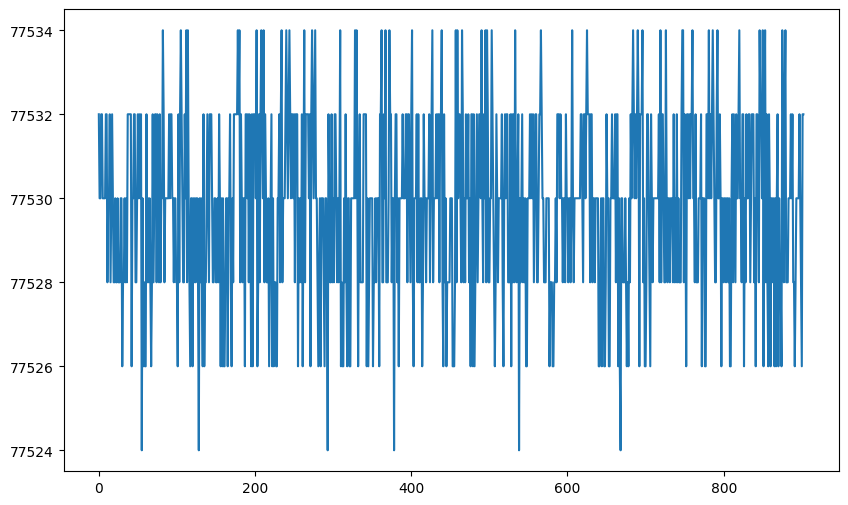

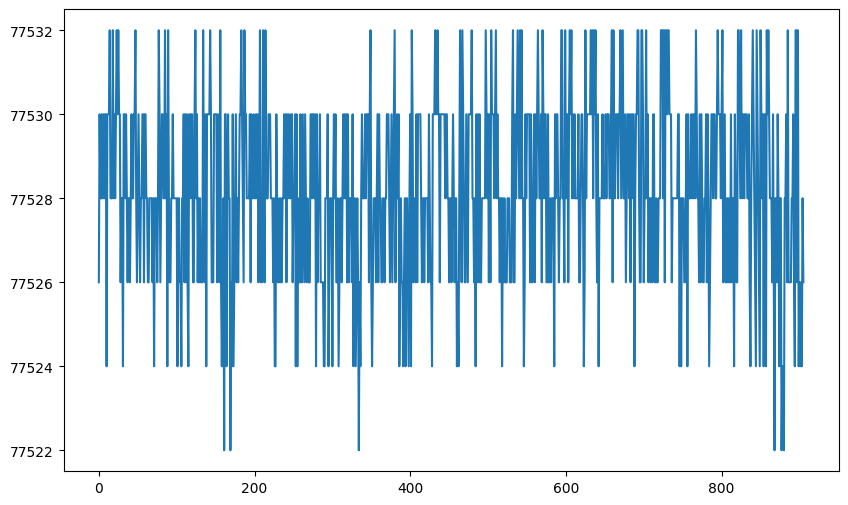

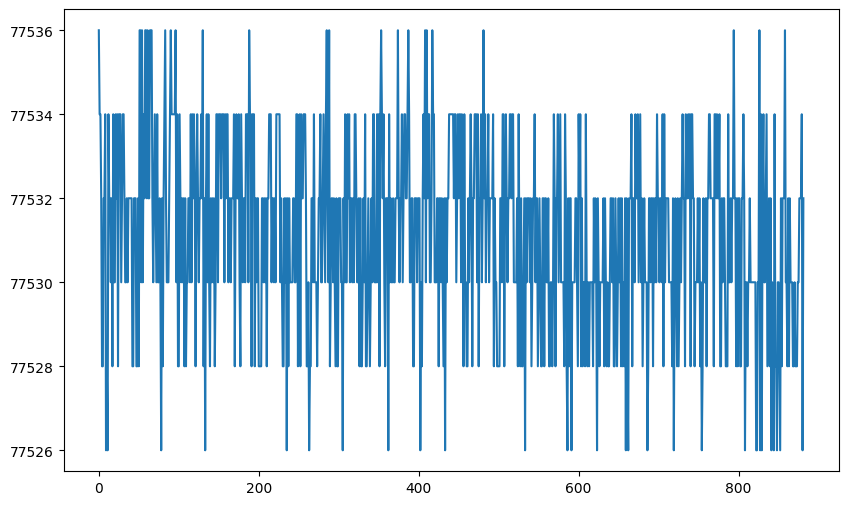

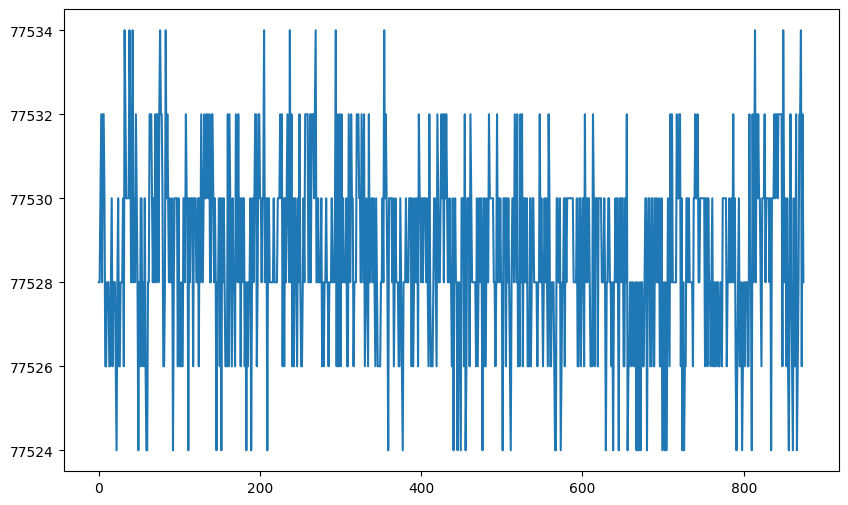

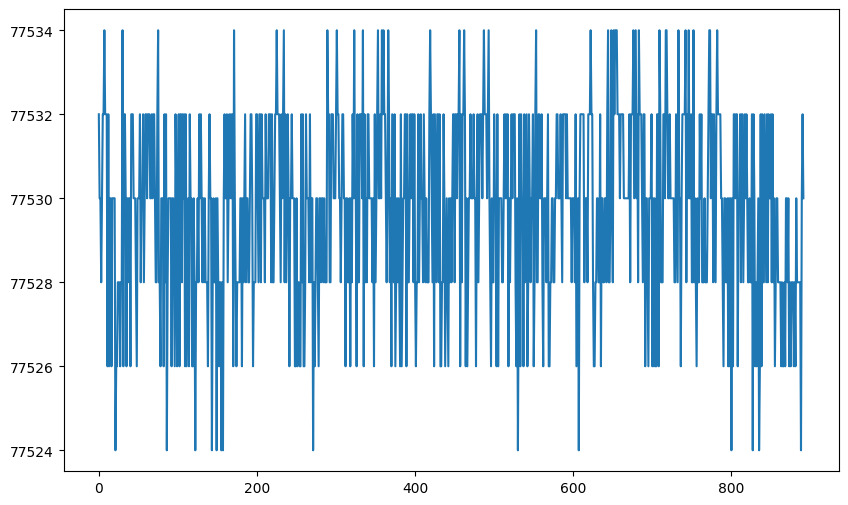

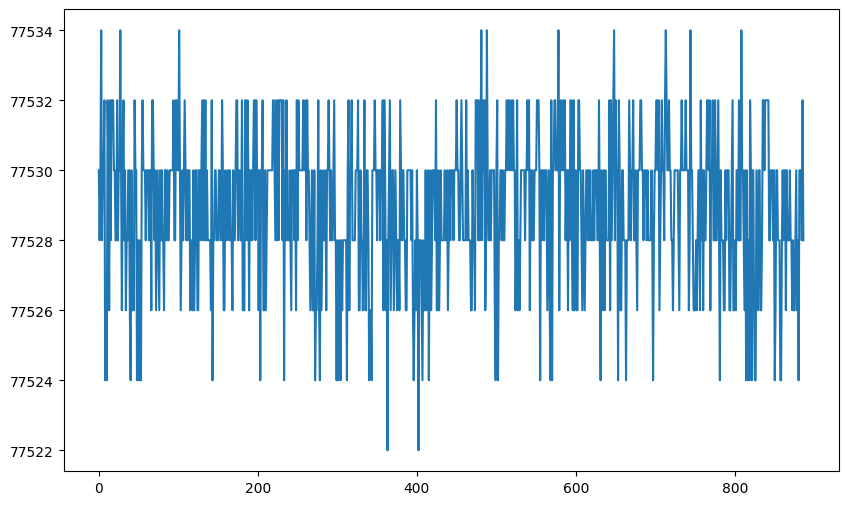

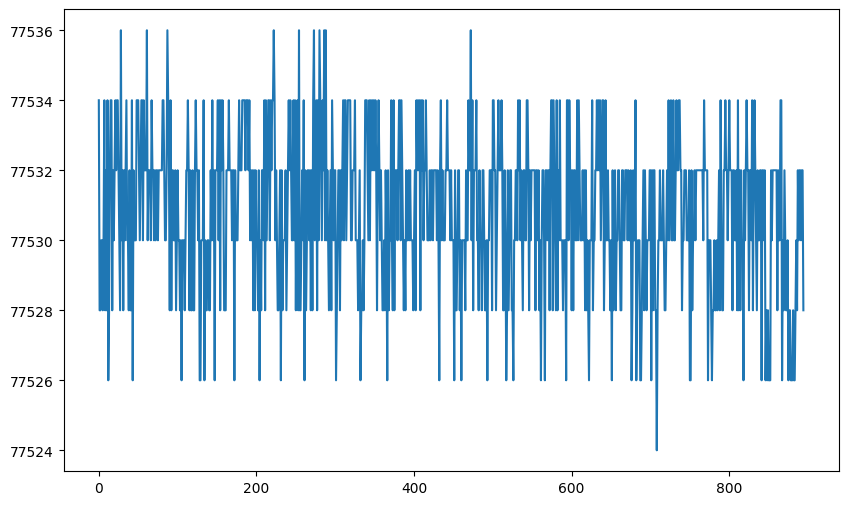

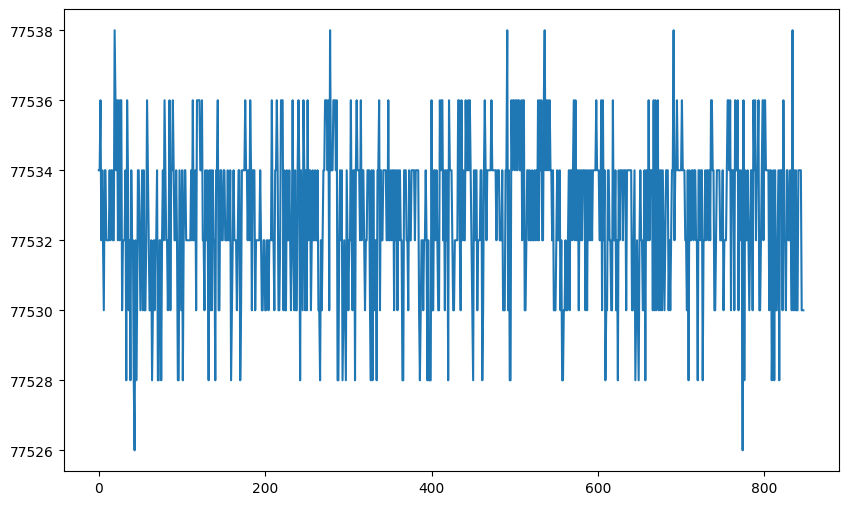

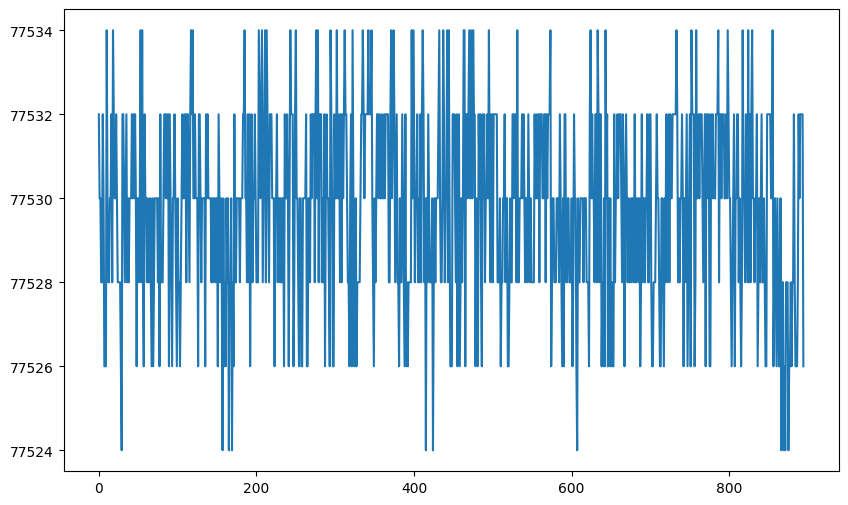

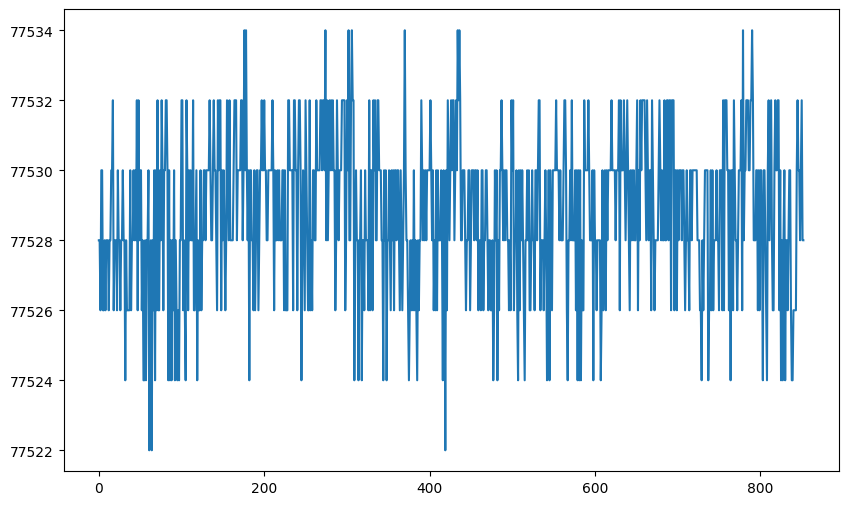

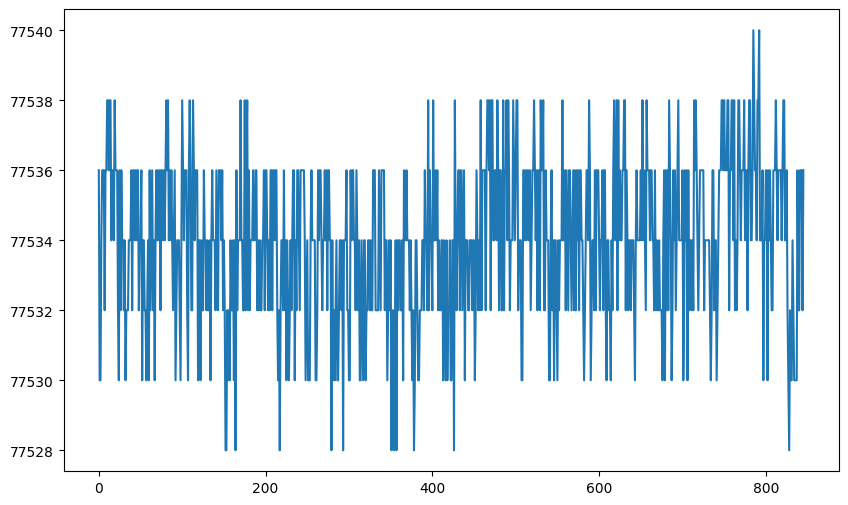

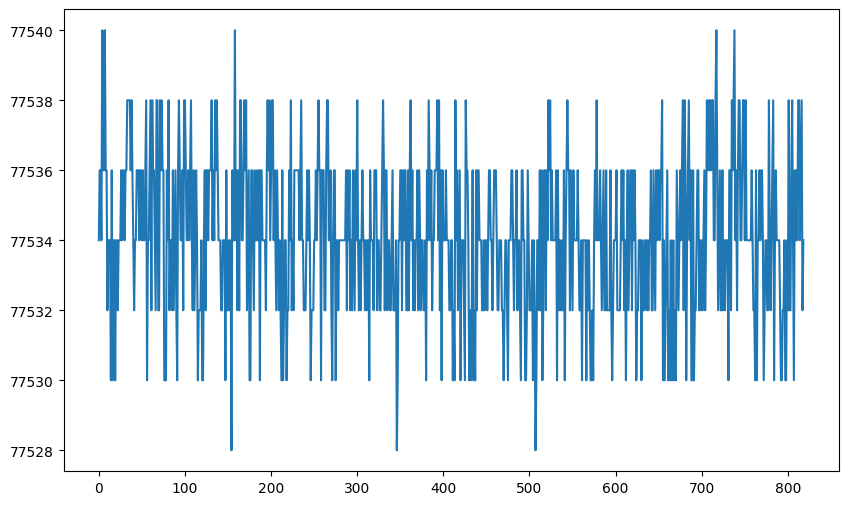

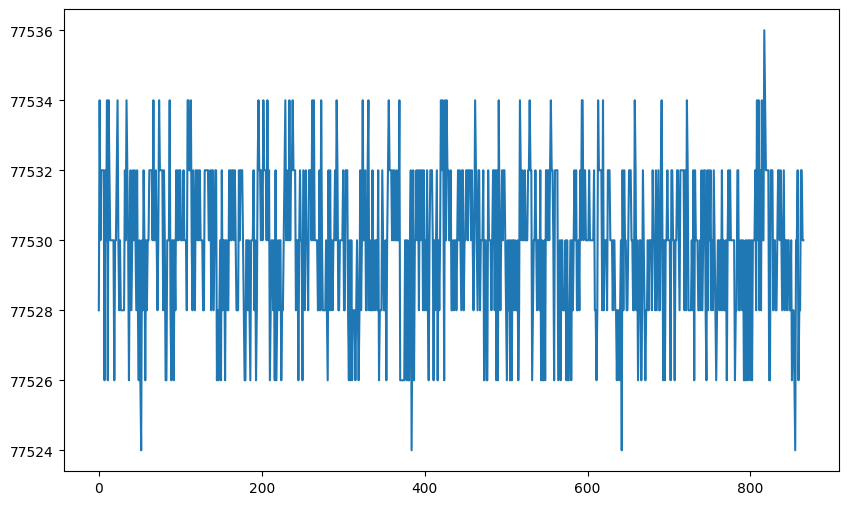

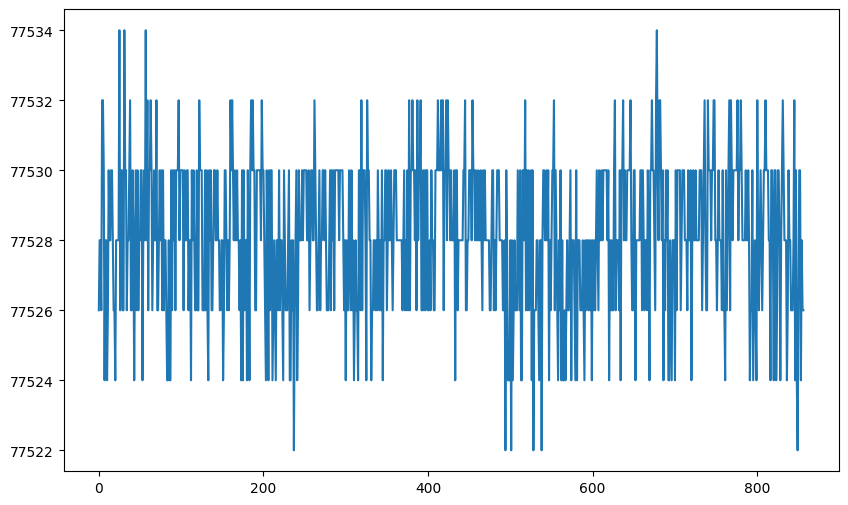

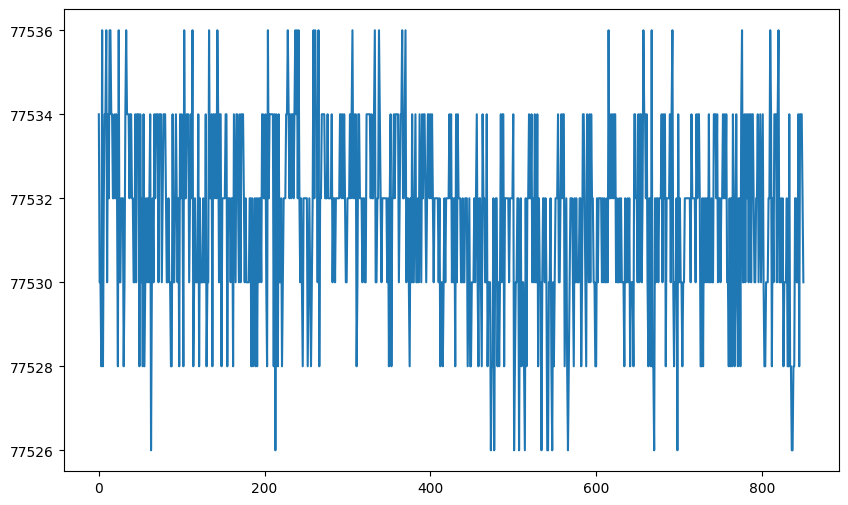

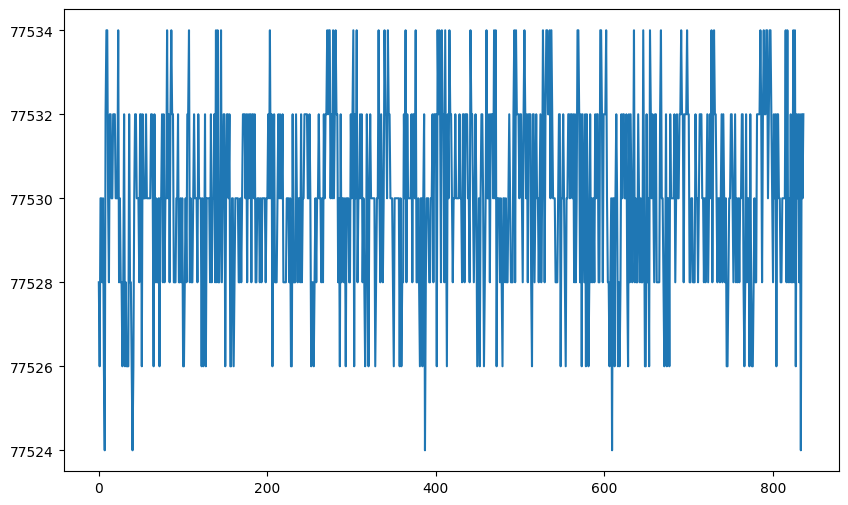

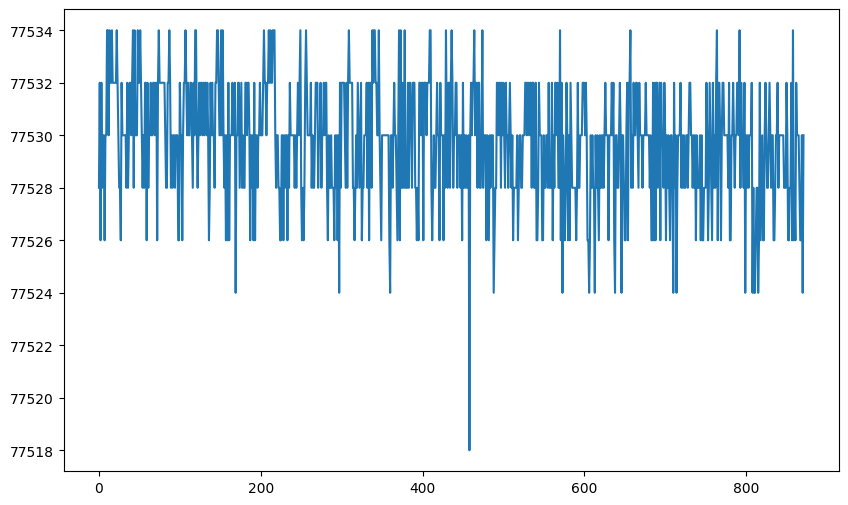

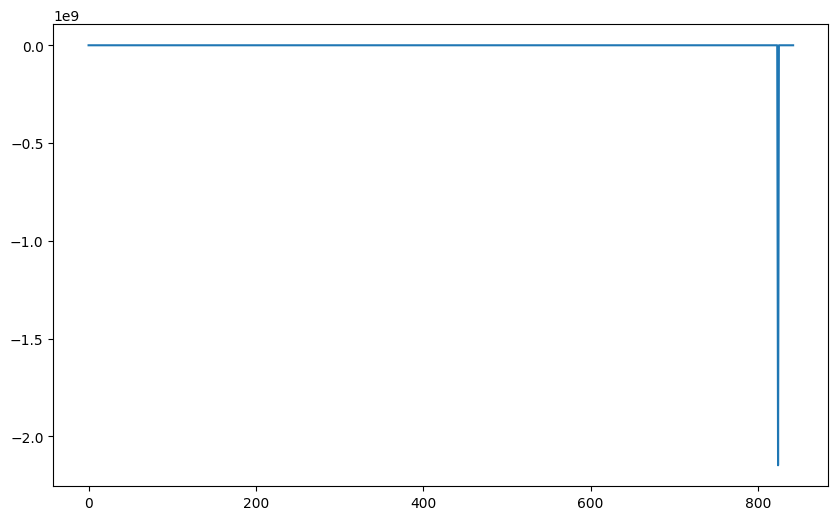

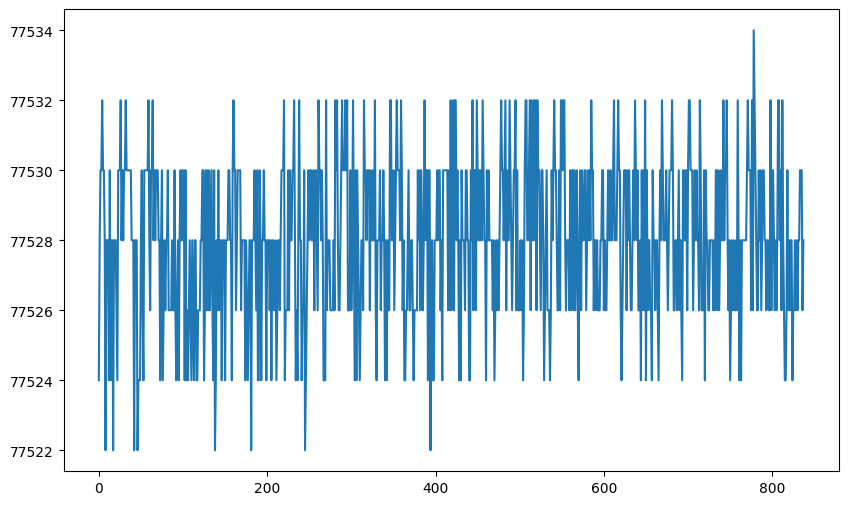

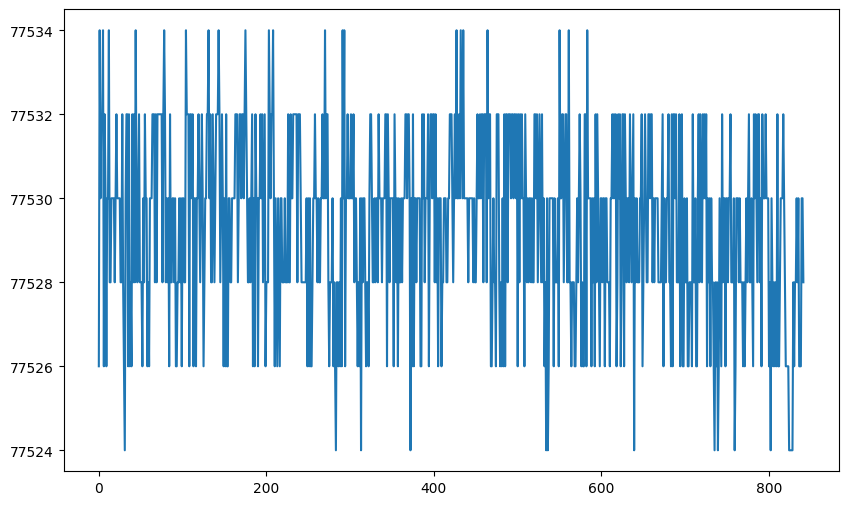

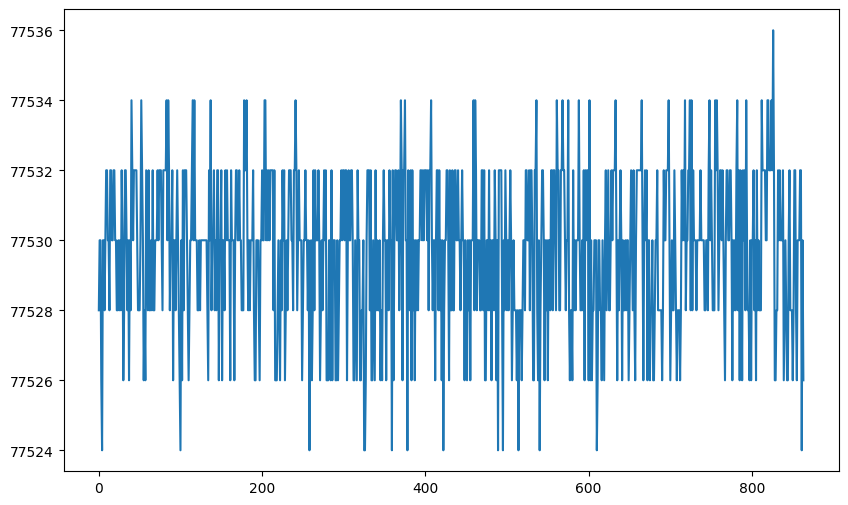

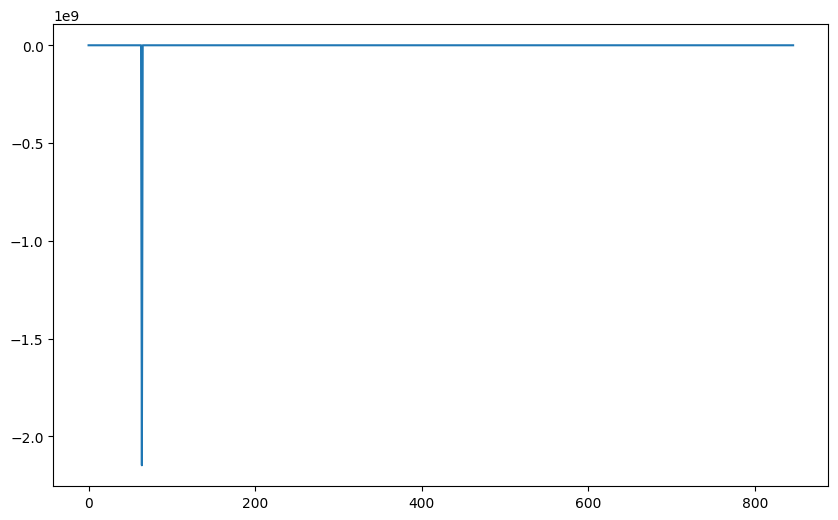

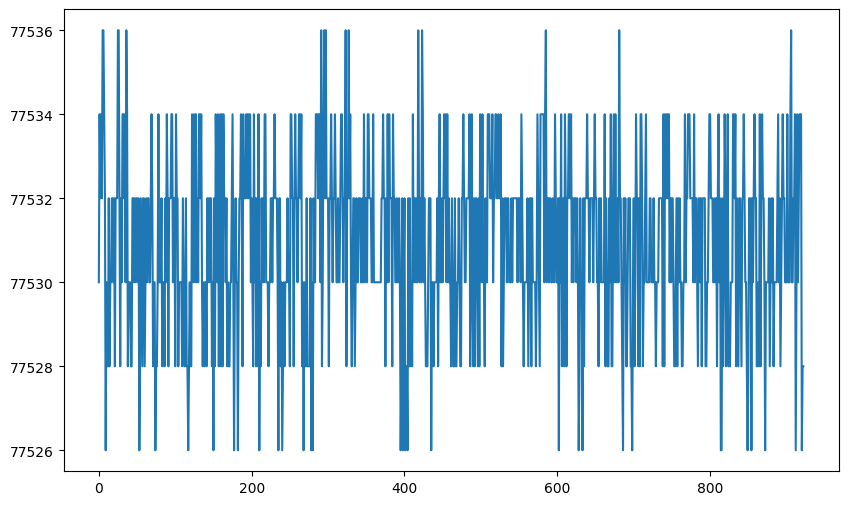

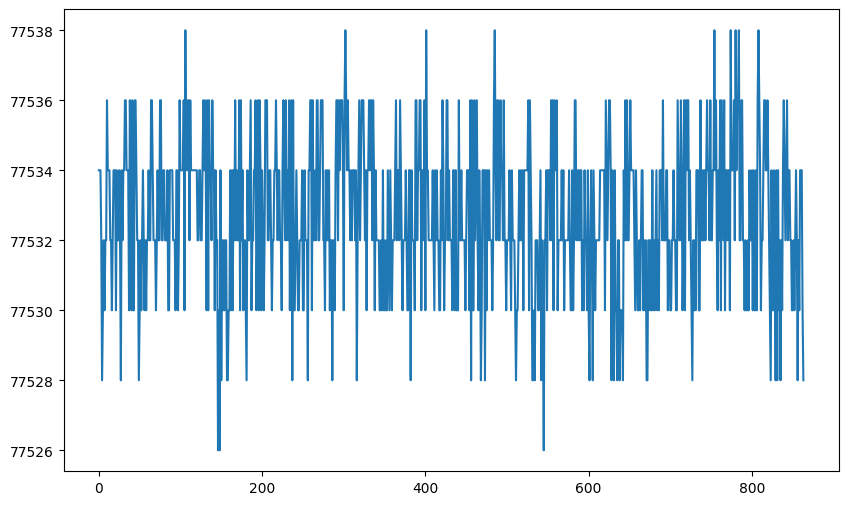

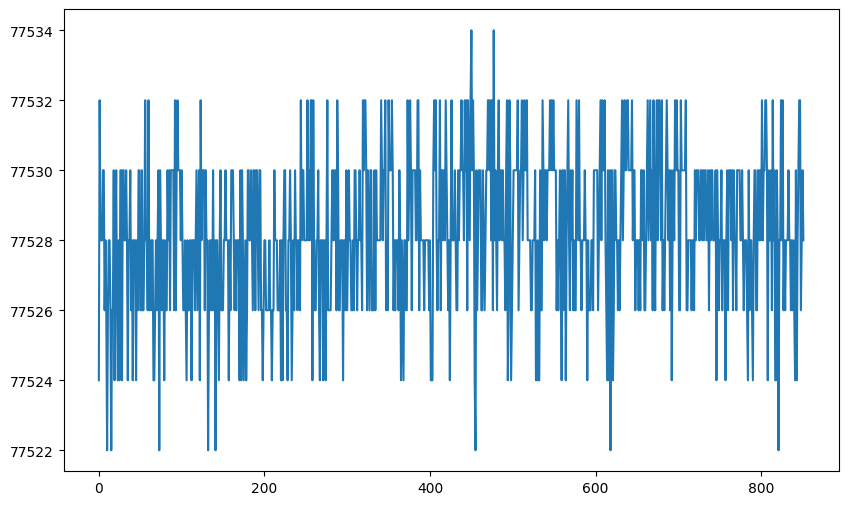

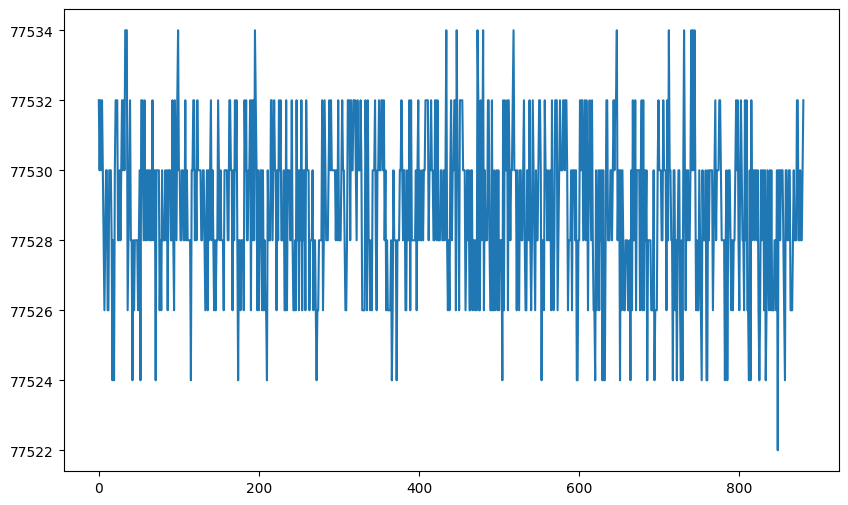

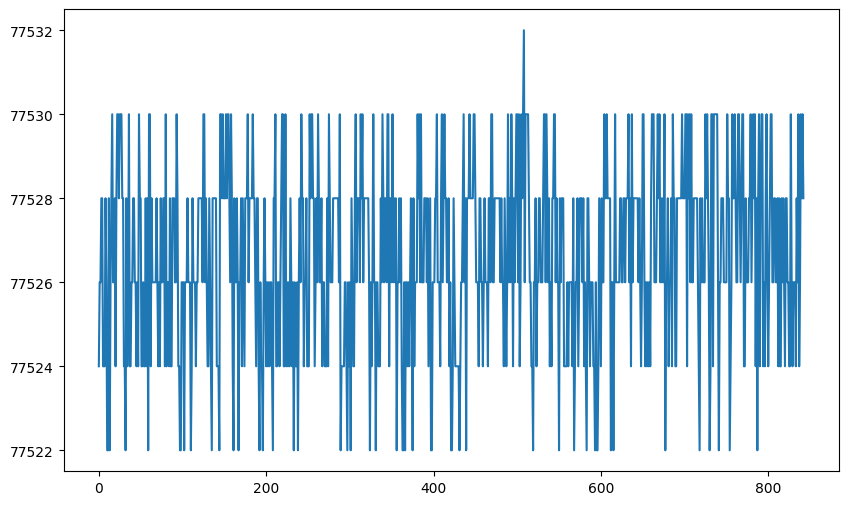

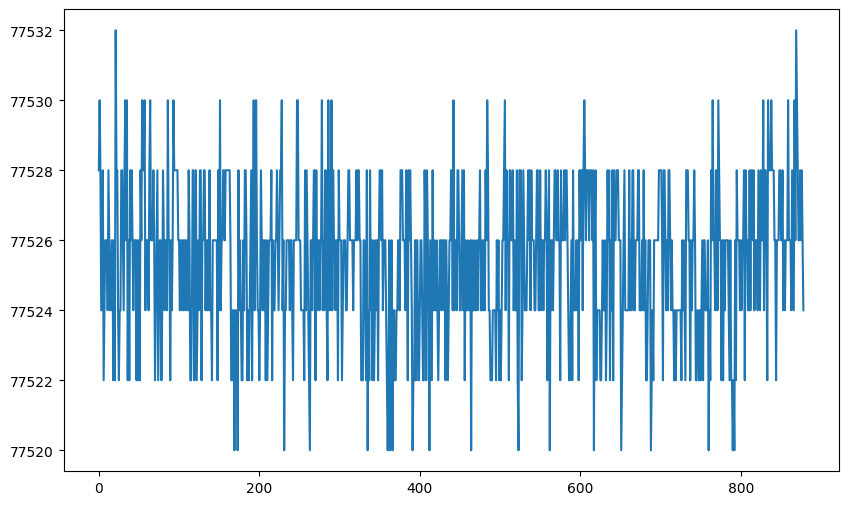

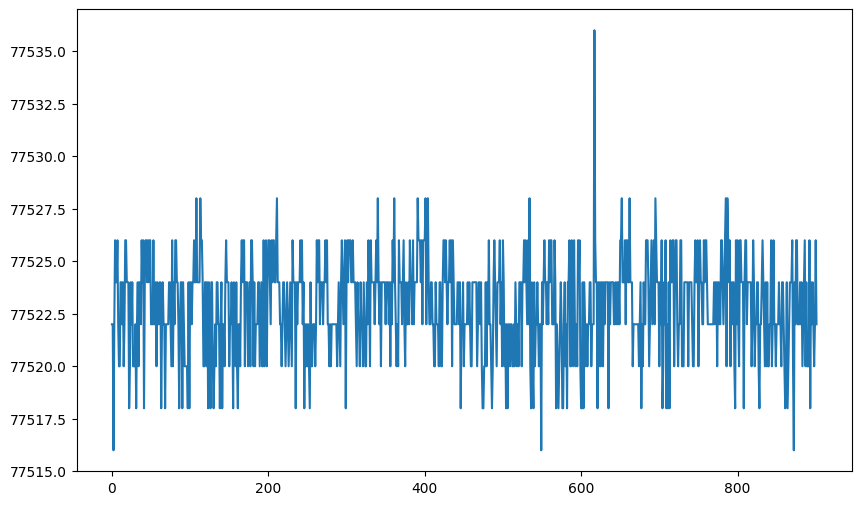

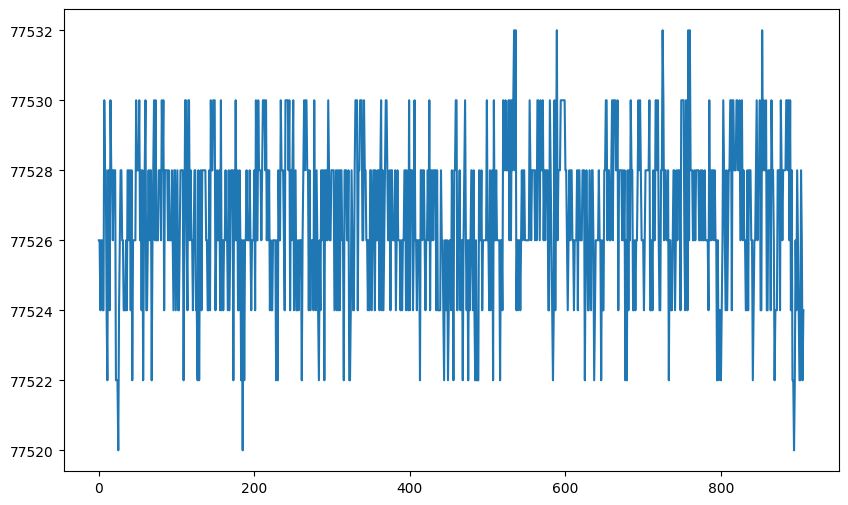

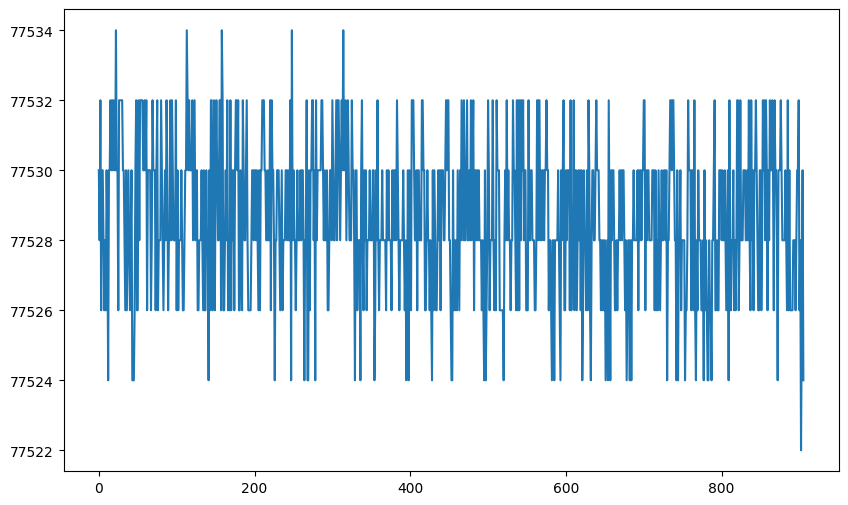

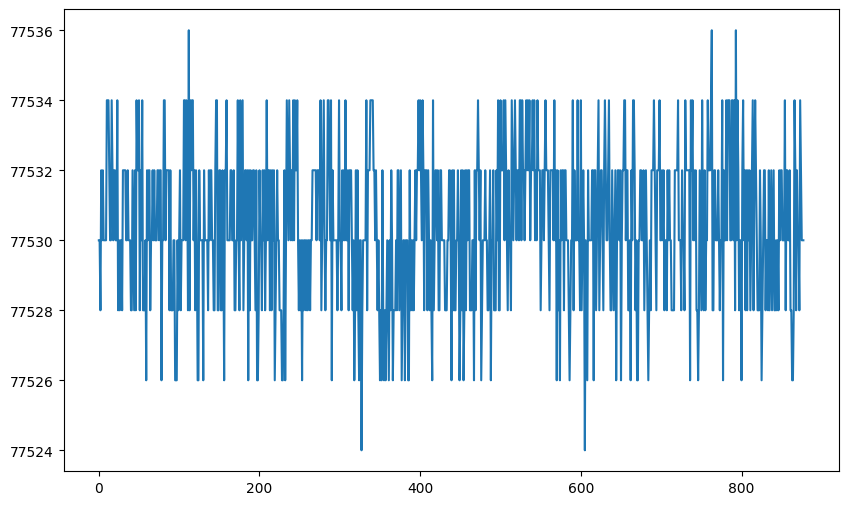

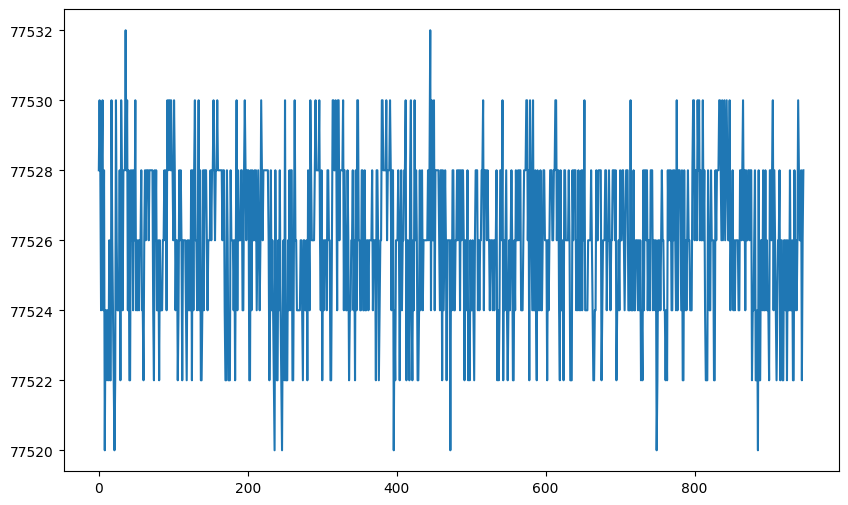

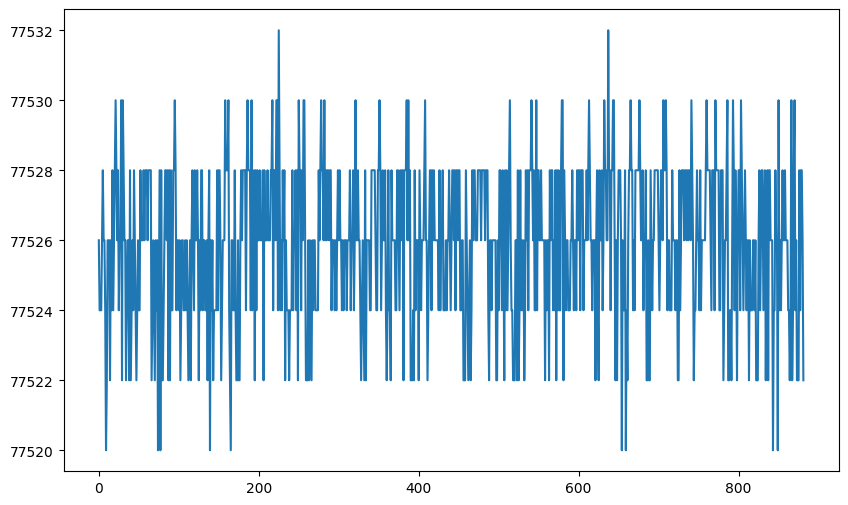

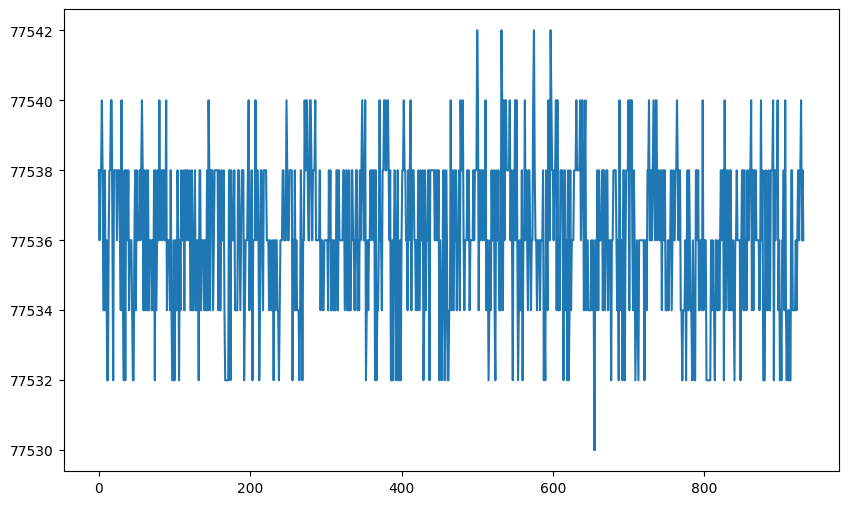

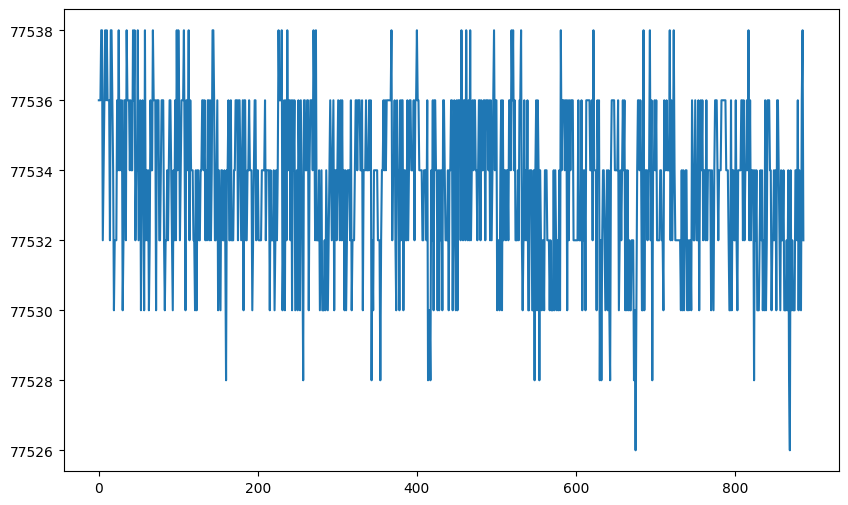

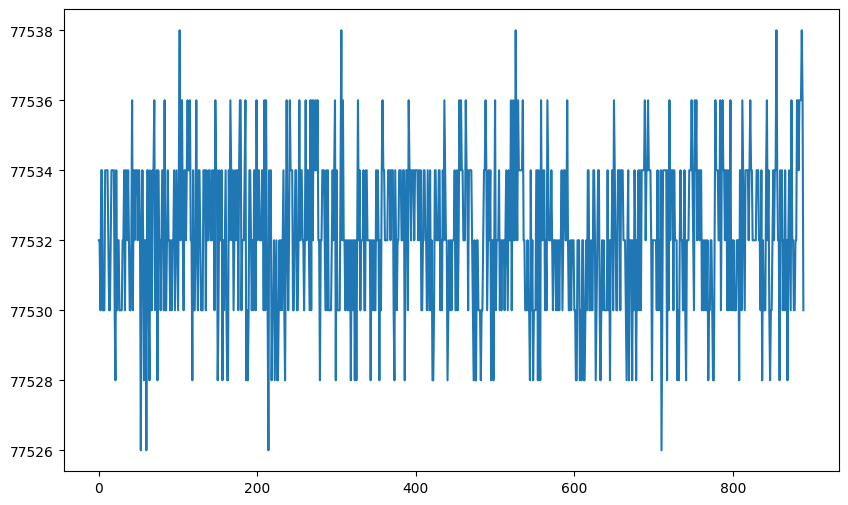

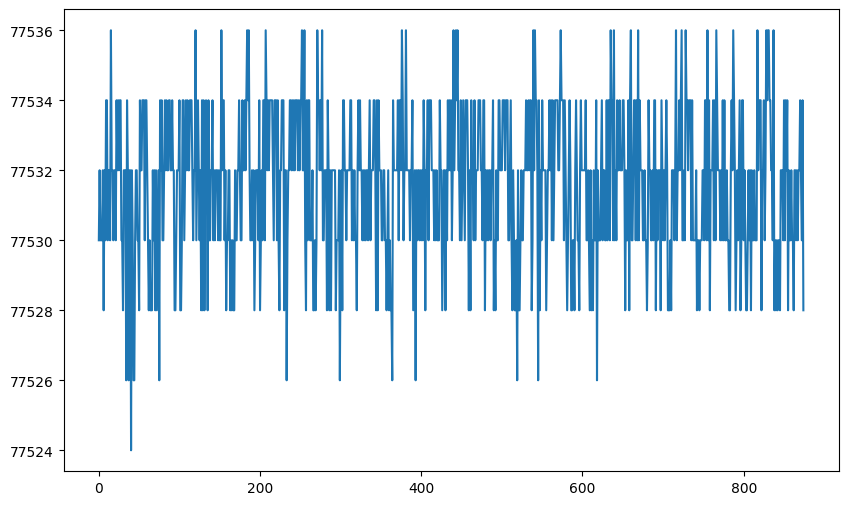

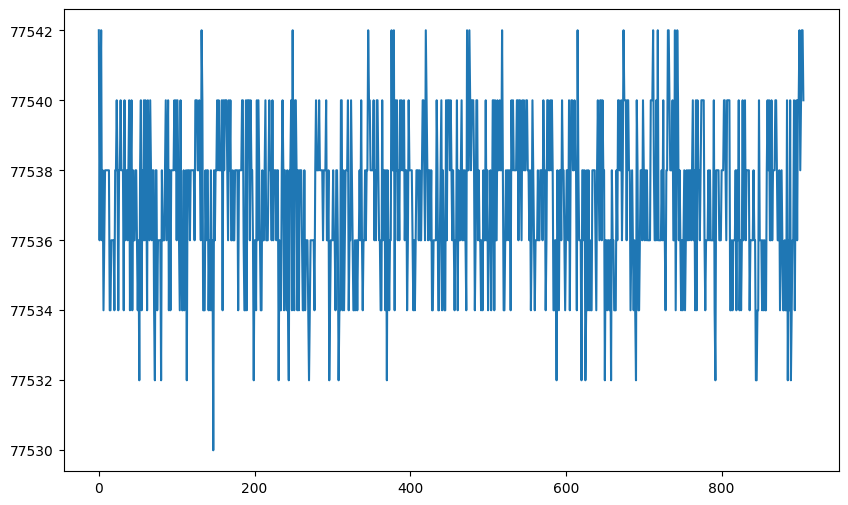

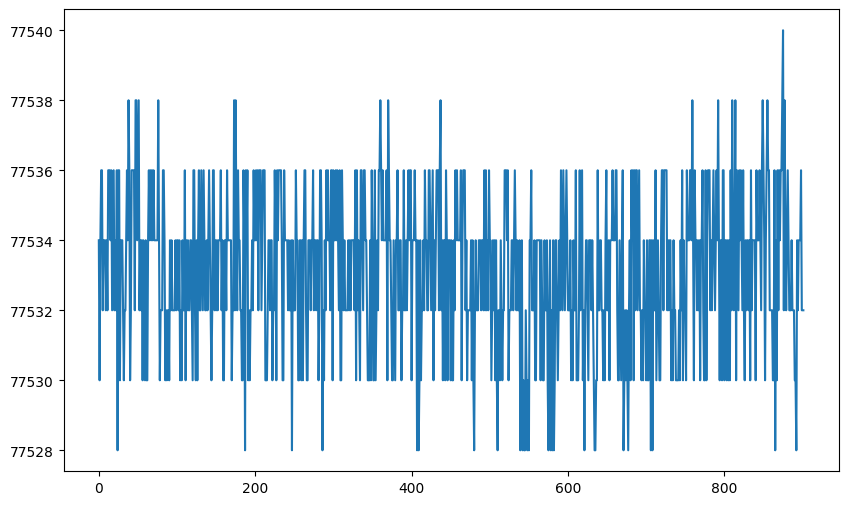

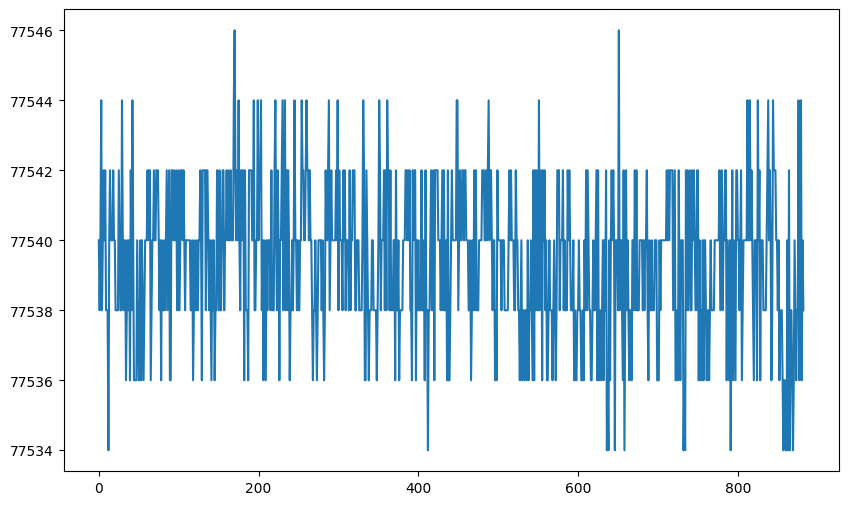

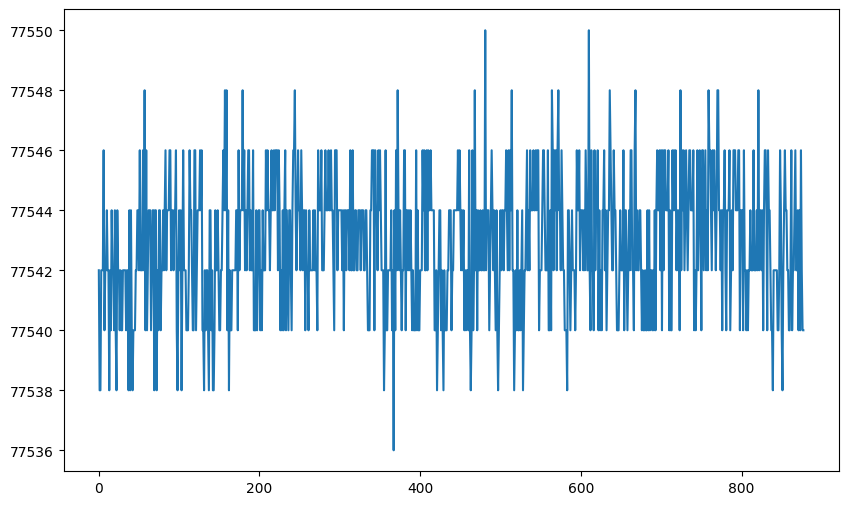

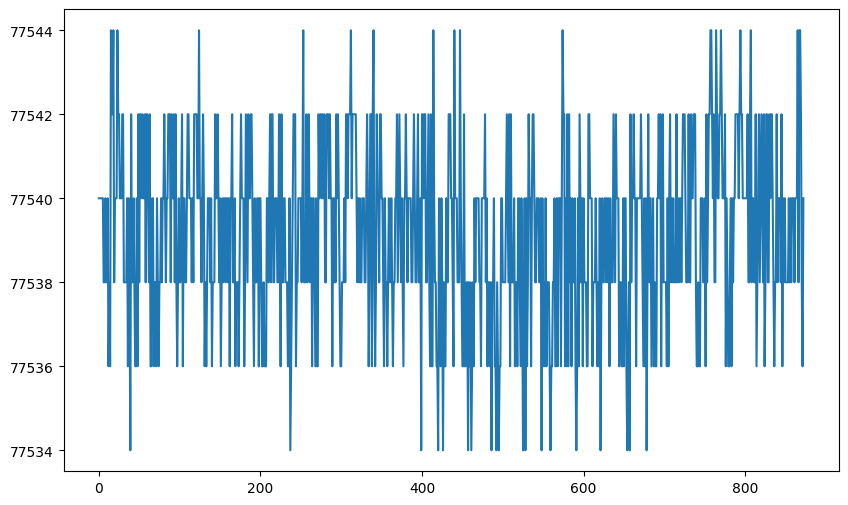

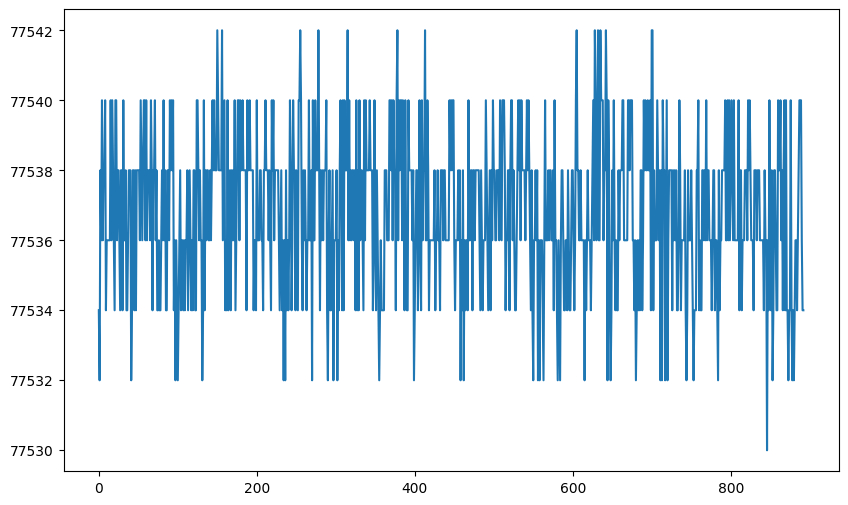

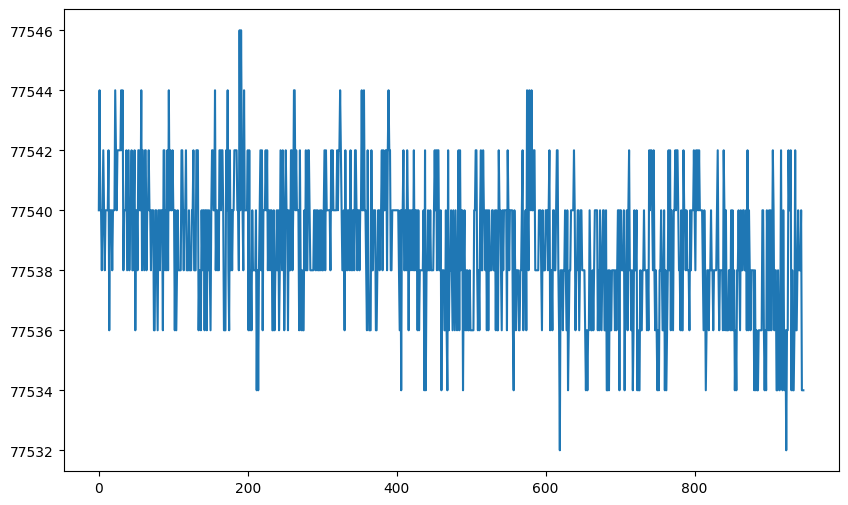

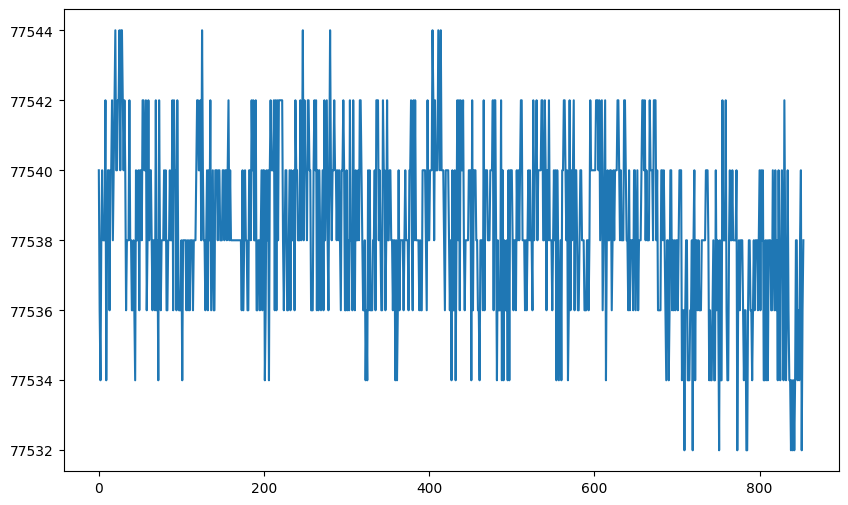

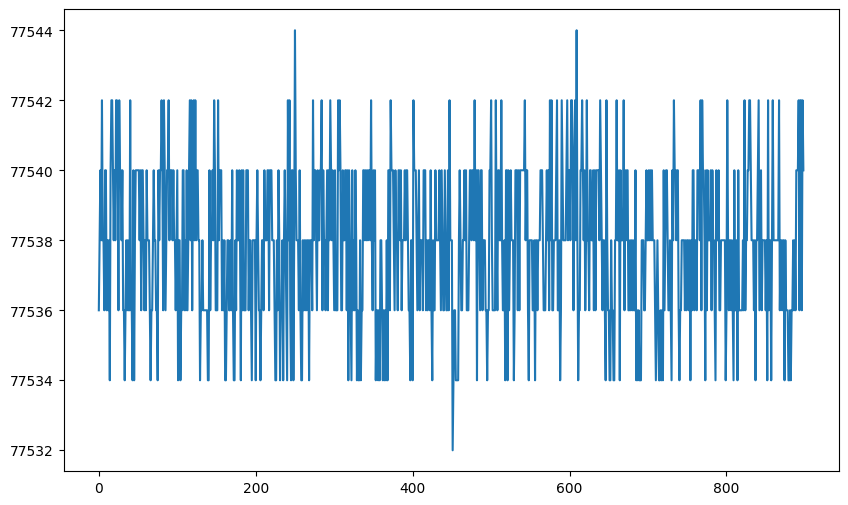

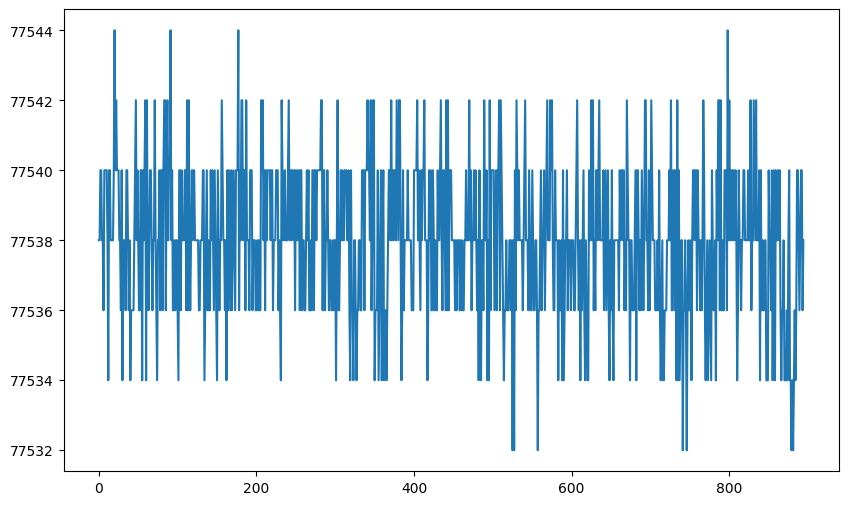

In [66]:
#spill = 8
for spill in range(52):
    channels = [8,9]
    digi = int(channels[0]/8)

    spill_events = np.where(run.times[digi]['spillNumber']==spill)
    ch_times = []
    triggerTimes = []
    triggerTimeDiffs = []
    triggerTime0 = None
    for ies,ie in enumerate(spill_events[0]):
        #if len(signal_times[channels[0]][ie]) == 1 and len(signal_times[channels[1]][ie]) == 1:
            if triggerTime0 is None:
                triggerTime0 = run.times[digi]['triggerTime'][ie]
            #ch_times.append(signal_times[channels[0]][ie][0])
            triggerTimes.append(run.times[digi]['triggerTime'][ie]- triggerTime0)
            if ies>0:
                triggerTimeDiffs.append(run.times[digi]['triggerTime'][ie]-run.times[digi]['triggerTime'][ie-1])

    fig, axs = plt.subplots(1, 1, figsize=(10, 6))
    plt.plot(triggerTimeDiffs[0:])
    plt.show()

In [62]:
triggerTimes[0:5],triggerTimeDiffs[0:5],len(triggerTimes),len(triggerTimeDiffs)

([0, 37546, 75066, 112626, 150176],
 [37546, 37520, 37560, 37550, 37496],
 1388,
 1387)

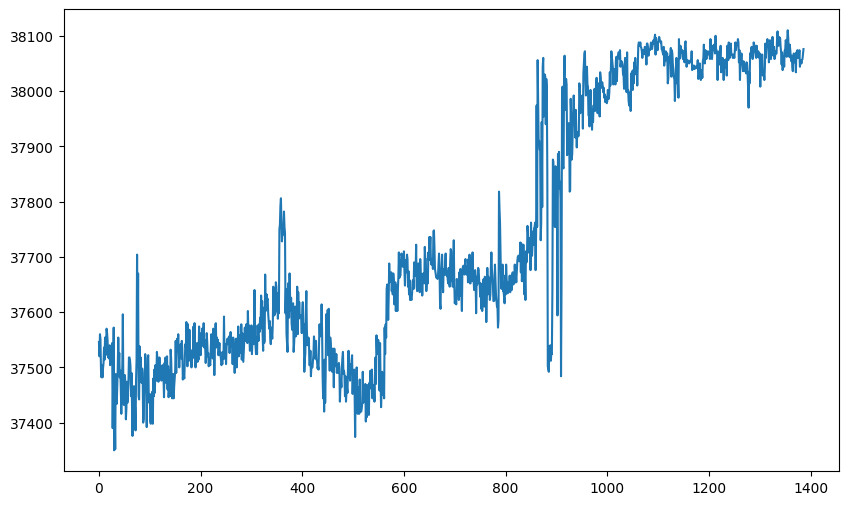

In [63]:
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
plt.plot(triggerTimeDiffs[0:])
plt.show()

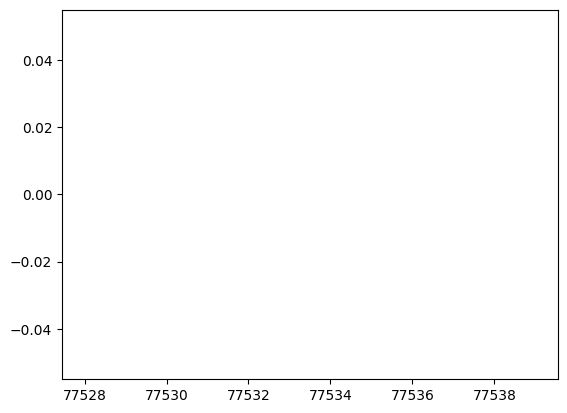

In [21]:
plt.hist(triggerTimeDiffs,range(77528,77540,1))
plt.show()

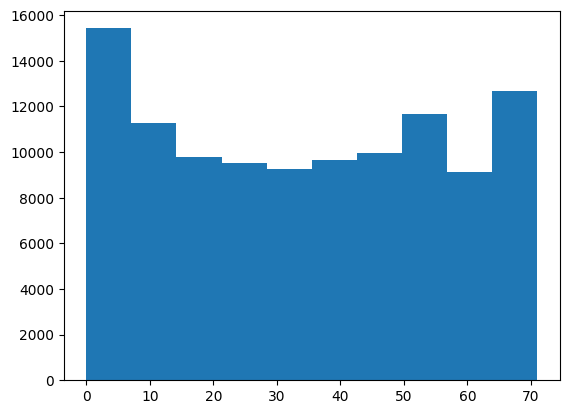

In [23]:
plt.hist(run.times[digi]['spillNumber'])
plt.show()